***Working on PDF File to Extract the Text***

In [1]:
### Install PyPDF2 tool ----> To extract text from pdf

!pip install PyPDF2


In [2]:
!pip install PyPDF4

In [3]:
### importing the library

#import PyPDF2 as pdf
import PyPDF4 as pdf

In [4]:
### to open the file

file = open('PythonNotes.pdf','rb')

In [5]:
file

<_io.BufferedReader name='PythonNotes.pdf'>

In [6]:
### to read the file ---> it reads the data of old pdf file and decrese of chances to loose original data

pdf_reader = pdf.PdfFileReader(file)

In [7]:
pdf_reader

In [8]:
help(pdf_reader)

Help on PdfFileReader in module PyPDF4.pdf object:

class PdfFileReader(builtins.object)
 |  PdfFileReader(stream, strict=True, warndest=None, overwriteWarnings=True)
 |  
 |  Initializes a PdfFileReader object.  This operation can take some time, as
 |  the PDF stream's cross-reference tables are read into memory.
 |  
 |  :param stream: A File object or an object that supports the standard read
 |      and seek methods similar to a File object. Could also be a
 |      string representing a path to a PDF file.
 |  :param bool strict: Determines whether user should be warned of all
 |      problems and also causes some correctable problems to be fatal.
 |      Defaults to ``True``.
 |  :param warndest: Destination for logging warnings (defaults to
 |      ``sys.stderr``).
 |  :param bool overwriteWarnings: Determines whether to override Python's
 |      ``warnings.py`` module with a custom implementation (defaults to
 |      ``True``).
 |  
 |  Methods defined here:
 |  
 |  __init__(s

In [9]:
p1 = pdf_reader.getPage(0)

In [10]:
### To write the pdf file ----> we can write the data out in another class in the memory

pdf_writer = pdf.PdfFileWriter()

In [11]:
### addPage --> it creates the space for the pdf in the memory for adding the data

pdf_writer.addPage(p1)

In [12]:
### to get the no of pages in the pdf

pdf_reader.getNumPages()

40

In [13]:
with open("Dummy PDF.json",'w',encoding='utf-8') as f:   ### Creating a json file 
    f.write("""Extracting the data from the pdf \n""")
    for page_num in range(pdf_reader.numPages):                ### pdf_read.numPages --> gives the pagenumber to page_num
        #print(page_num)
        page = pdf_reader.getPage(page_num)                    ### Getting the data from particular pagenumbers
        try:
            txt = page.extractText()                           ### extracting the data as text
            #print(txt)
        except:
            pass
        else:
            f.write("\t Page {0} \n".format(page_num+1))        ### Adding the pages into new file with pagenums
            f.write(" ".join("\n"))
            f.write(txt)                                        ### writing the data which is extracted
    f.close()

In [14]:
with open("Dummy PDF.txt",'w',encoding='utf-8') as f:           ### Creating a txt file 
    for page_num in range(pdf_reader.numPages):
        #print(page_num)
        page = pdf_reader.getPage(page_num)                    ### Getting the data from particular pagenumbers
        try:
            txt = page.extractText()                           ### extracting the data as text
           # print(txt)
        except:
            pass
        else:
            f.write("\t Page {0} \n".format(page_num+1))        ### Adding the pages into new file with pagenums
            f.write(" ".join("\n"))
            f.write(txt)                                        ### writing the data which is extracted
    f.close()

In [29]:
import PyPDF4
import re
import io

pdfFileObj = open('PythonNotes.pdf','rb')
pdfReader = PyPDF4.pdfFileReader(pdfFileObj)
pageObj = pdfReader.getPage(1)
pages_text = pageObj.extractText()

for line in pages_text.split('\n'):
    print(line)

AttributeError: module 'PyPDF4' has no attribute 'pdfFileReader'

In [20]:
#char = input("enter the word")
#l = []
#s = txt.split()
#count = 0
#for char in txt:
#    if char == txt:
#        count = count + 1
#        l = s
#print("Word is {} and count is {}",format(char,count))

***Extracting text from images***

In [1]:
pip install pytesseract

  Stored in directory: C:\Users\DILEEP\AppData\Local\pip\Cache\wheels\a2\66\45\88bf1b2d428817a006944b9730b27d6861b776e05a9e262bd4
Successfully built pytesseract
Note: you may need to restart the kernel to use updated packages.


In [23]:
### import pytesseract

import pytesseract 

In [26]:
### PIL (Python Image Library) ---> which is used for working on images like manipulating,saving images etc
from PIL import Image

In [8]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [27]:
### command used for reading the path of tesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [28]:
### Loading the image

img = Image.open('pic.jpg')

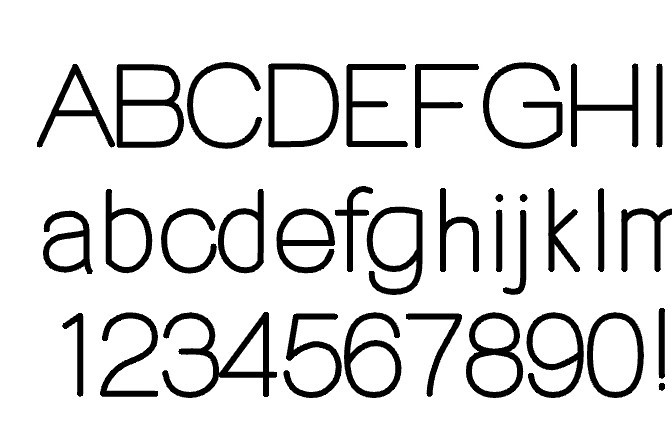

In [29]:
## image printed
img

In [30]:
### Extracting the text from image using image_to_string

text = pytesseract.image_to_string(img)

In [32]:
### extracted data from image 
print(text)

ABCDEF GH
abcdefghijk|n
1234567890!



In [36]:
### PyMuPDF ---> tool used for pdf files for extracting pictures and also for text 
pip install PyMuPDF

Note: you may need to restart the kernel to use updated packages.


In [5]:
## it is the library which we use for extracting
import fitz

In [18]:
## To open the file
file = fitz.open('AnimalNames.pdf')

In [19]:
### Extracting the text from the pdf file 

for pagenumber, page in enumerate(file.pages(),start =1):
    text = page.getText()
    
    txt = open('AnimalNames.txt','a',encoding = 'utf-8')
    txt.writelines(text)
    txt.close()

In [20]:
txt

<_io.TextIOWrapper name='AnimalNames.txt' mode='a' encoding='utf-8'>

In [23]:
### Extracting the images from pdf file

for pagenumber,page in enumerate(file.pages(),start =1):
    for imgnumber, img in enumerate(page.getImageList(),start=1):
        xref = img[0]
        
        pix = fitz.Pixmap(file,xref)
        
        if pix.n > 4:
            pix = fitz.Pixmap(fitz.csRGB,pix)
        pix.writePNG('images.png')

In [64]:
### splitting the data in the text file

f=open("AnimalNames.txt",'r')

content = f.read() 
content_list = content.split()     ## to split the words in the list format 
                                   ## To split the linewise we use splitlines

print(content_list)

['Animal', 'names', 'There', 'is', 'a', 'difference', 'between', 'wild', 'and', 'domestic', 'animals.', 'Here', 'the', 'difference', 'between', 'them', 'is', 'clearly', 'mentioned', 'and', 'also', 'their', 'pics', 'so', 'that', 'children', 'can', 'learn.', 'Also,', 'animal', 'names', 'are', 'completely', 'described', 'with', 'their', 'images', 'that', 'are', 'easy', 'to', 'memorize', 'for', 'children.', 'Infographics', 'Wild', 'Animals', 'Names', 'Wild', 'Animals', 'Names', '1', 'Antelope', '2', 'Walrus', '3', 'Bat', '4', 'Zebra', '5', 'Bear', '6', 'Leopard', '7', 'Chipmunk', '8', 'Elk', '9', 'Deer', '10', 'Red', 'panda', '11', 'Elephant', '12', 'Panda', '13', 'Giraffe', '14', 'Bald', 'eagle', '15', 'Gorilla', '16', 'Otter', '17', 'Hippopotamus', '18', 'Mole', '19', 'Lizard', '20', 'Coyote', '21', 'Monkey', '22', 'Chimpanzee', '23', 'Otter', '24', 'Koala', '25', 'Owl', '26', 'Arctic', 'wolf', '27', 'Porcupine', '28', 'Possum', '29', 'Raccoon', '30', 'Hedgehog', '31', 'Rat', '32', 'Womb

***Get the required word (how many times present) in a text file***

In [63]:
char = input("enter the word : ")
count = 0

for i in content_list:
   
    if i == char :
        count = count + 1
print("count is : ",count)

enter the word : Python
count is :  0


***Get no of times present for every word***

In [72]:
c = {}

for i in content_list:
    c[i] = content_list.count(i)
print(c)

{'Animal': 2, 'names': 3, 'There': 1, 'is': 2, 'a': 1, 'difference': 2, 'between': 2, 'wild': 1, 'and': 2, 'domestic': 1, 'animals.': 1, 'Here': 1, 'the': 1, 'them': 1, 'clearly': 1, 'mentioned': 1, 'also': 1, 'their': 2, 'pics': 1, 'so': 1, 'that': 2, 'children': 1, 'can': 1, 'learn.': 1, 'Also,': 1, 'animal': 1, 'are': 2, 'completely': 1, 'described': 1, 'with': 1, 'images': 1, 'easy': 1, 'to': 1, 'memorize': 1, 'for': 1, 'children.': 1, 'Infographics': 1, 'Wild': 2, 'Animals': 3, 'Names': 3, '1': 2, 'Antelope': 1, '2': 2, 'Walrus': 1, '3': 2, 'Bat': 1, '4': 2, 'Zebra': 1, '5': 2, 'Bear': 1, '6': 2, 'Leopard': 1, '7': 2, 'Chipmunk': 1, '8': 2, 'Elk': 1, '9': 2, 'Deer': 2, '10': 2, 'Red': 1, 'panda': 1, '11': 2, 'Elephant': 1, '12': 2, 'Panda': 1, '13': 2, 'Giraffe': 1, '14': 2, 'Bald': 1, 'eagle': 1, '15': 2, 'Gorilla': 1, '16': 2, 'Otter': 2, '17': 1, 'Hippopotamus': 1, '18': 1, 'Mole': 1, '19': 1, 'Lizard': 1, '20': 1, 'Coyote': 1, '21': 1, 'Monkey': 1, '22': 1, 'Chimpanzee': 1, '2